In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
pd.set_option("display.precision", 2)

df = pd.read_csv('./dengue_features_train_with_out.csv')
df.head()


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.12,0.10,0.20,0.18,12.42,297.57,...,73.37,12.42,14.01,2.63,25.44,6.90,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.17,0.14,0.16,0.16,22.82,298.21,...,77.37,22.82,15.37,2.37,26.71,6.37,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.03,0.17,0.16,0.17,34.54,298.78,...,82.05,34.54,16.85,2.30,26.71,6.49,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.13,0.25,0.23,0.24,15.36,298.99,...,80.34,15.36,16.67,2.43,27.47,6.77,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.20,0.26,0.25,0.25,7.52,299.52,...,80.46,7.52,17.21,3.01,28.94,9.37,35.0,23.9,5.8,6


In [73]:
print(df.columns)
print(df.info())

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 

In [74]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.00,1456.00,1262.00,1404.00,1434.00,1434.00,1443.00,1446.00,1446.00,1446.00,...,1446.00,1443.00,1446.00,1446.00,1413.00,1413.00,1436.00,1442.00,1434.00,1456.00
mean,2001.03,26.50,0.14,0.13,0.20,0.20,45.76,298.70,299.23,295.25,...,82.16,45.76,16.75,4.90,27.19,8.06,32.45,22.10,39.33,24.68
std,5.41,15.02,0.14,0.12,0.07,0.08,43.72,1.36,1.26,1.53,...,7.15,43.72,1.54,3.55,1.29,2.13,1.96,1.57,47.46,43.60
min,1990.00,1.00,-0.41,-0.46,-0.02,-0.06,0.00,294.64,294.89,289.64,...,57.79,0.00,11.72,1.36,21.40,4.53,26.70,14.70,0.00,0.00
25%,1997.00,13.75,0.04,0.05,0.16,0.14,9.80,297.66,298.26,294.12,...,77.18,9.80,15.56,2.33,26.30,6.51,31.10,21.10,8.70,5.00
50%,2002.00,26.50,0.13,0.12,0.20,0.19,38.34,298.65,299.29,295.64,...,80.30,38.34,17.09,2.86,27.41,7.30,32.80,22.20,23.85,12.00
75%,2005.00,39.25,0.25,0.22,0.25,0.25,70.23,299.83,300.21,296.46,...,86.36,70.23,17.98,7.62,28.16,9.57,33.90,23.30,53.90,28.00
max,2010.00,53.00,0.51,0.45,0.54,0.55,390.60,302.20,302.93,298.45,...,98.61,390.60,20.46,16.03,30.80,15.80,42.20,25.60,543.30,461.00


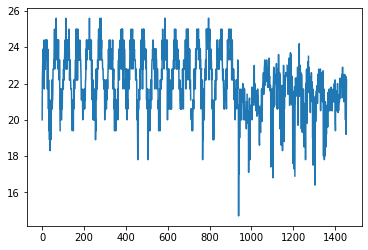

In [125]:
df['station_precip_mm'].plot(kind='line')

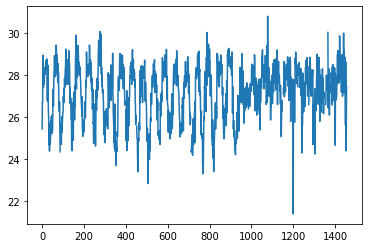

In [126]:
df['station_avg_temp_c'].plot(kind='line')

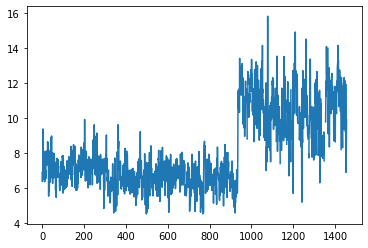

In [127]:
df['station_diur_temp_rng_c'].plot(kind='line')

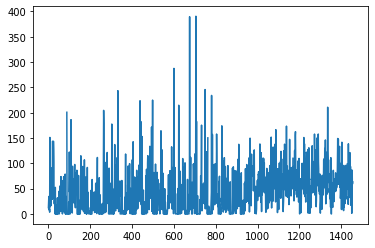

In [128]:
df['precipitation_amt_mm'].plot(kind='line')

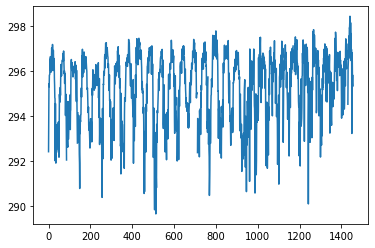

In [129]:
df['reanalysis_dew_point_temp_k'].plot(kind='line')

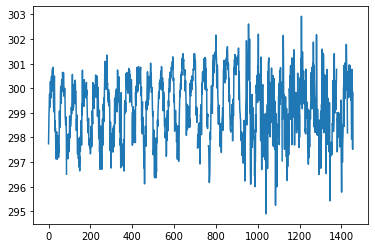

In [130]:
df['reanalysis_avg_temp_k'].plot(kind='line')

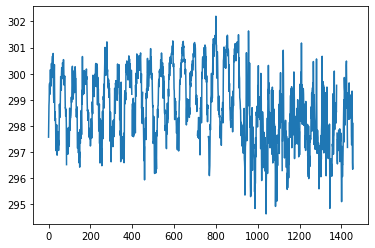

In [131]:
df['reanalysis_air_temp_k'].plot(kind='line')

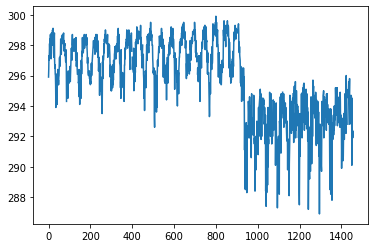

In [132]:
df['reanalysis_min_air_temp_k'].plot(kind='line')

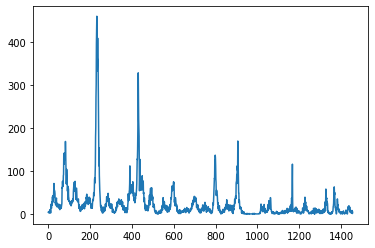

In [133]:
df['total_cases'].plot(kind='line')

In [79]:
x = df[['station_min_temp_c']].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()

df_normalized = pd.DataFrame(min_max_scaler.fit_transform(x))

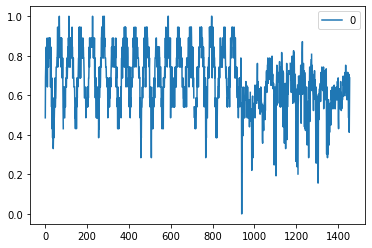

In [80]:
df_normalized.plot(kind='line')

In [89]:
columns_to_show = ['precipitation_amt_mm', 'reanalysis_dew_point_temp_k', 
                   'reanalysis_specific_humidity_g_per_kg', 'reanalysis_avg_temp_k', 
                   'station_avg_temp_c', 'total_cases']
grouped = df[columns_to_show].groupby(["total_cases"])
x = grouped
grouped.describe(percentiles=[])
# pd.DataFrame(grouped.mean()['station_precip_mm']).plot(kind='line')


precipitation_amt_mm                                      \
                           count   mean    std    min    50%     max   
total_cases                                                            
0                           99.0  55.83  32.10   0.00  53.65  157.75   
1                           58.0  59.88  44.10   0.00  51.43  214.76   
2                           69.0  50.43  38.04   0.00  45.69  141.65   
3                           70.0  51.61  40.43   0.00  50.31  133.47   
4                           55.0  52.41  49.65   0.00  47.15  234.13   
...                          ...    ...    ...    ...    ...     ...   
381                          1.0  75.57    NaN  75.57  75.57   75.57   
395                          1.0  55.88    NaN  55.88  55.88   55.88   
410                          1.0  32.26    NaN  32.26  32.26   32.26   
426                          1.0   0.63    NaN   0.63   0.63    0.63   
461                          1.0  16.70    NaN  16.70  16.70   16.70   

            reanalysis_dew_point_temp_k                        ...  \
                                  count    mean   std     min  ...   
total_cases                                                    ...   
0                                  99.0  294.64  1.37  290.57  ...   
1                                  58.0  295.09  1.42  290.64  ...   
2                                  69.0  295.16  1.62  289.64  ...   
3                                  70.0  294.78  1.48  291.23  ...   
4                                  55.0  295.38  1.55  291.78  ...   
...                                 ...     ...   ...     ...  ...   
381                                 1.0  295.69   NaN  295.69  ...   
395                                 1.0  295.82   NaN  295.82  ...   
410                                 1.0  295.58   NaN  295.58  ...   
426                                 1.0  295.36   NaN  295.36  ...   
461                                 1.0  295.48   NaN  295.48  ...   

            reanalysis_avg_temp_k                         station_avg_temp_c  \
                              std     min     50%     max              count   
total_cases                                                                    
0                            1.53  295.42  299.21  302.61               91.0   
1                            1.40  295.24  298.31  301.94               56.0   
2                            1.34  295.99  299.11  302.93               69.0   
3                            1.17  295.78  298.70  301.37               65.0   
4                            1.24  296.74  299.56  301.23               52.0   
...                           ...     ...     ...     ...                ...   
381                           NaN  300.40  300.40  300.40                1.0   
395                           NaN  299.64  299.64  299.64                1.0   
410                           NaN  299.13  299.13  299.13                1.0   
426                           NaN  300.50  300.50  300.50                1.0   
461                           NaN  299.62  299.62  299.62                1.0   

                                               
              mean   std    min    50%    max  
total_cases                                    
0            27.25  0.74  25.34  27.20  29.02  
1            27.13  1.03  24.40  27.34  28.60  
2            27.35  1.07  24.00  27.60  29.17  
3            27.07  1.26  24.53  26.93  29.87  
4            27.41  1.17  24.70  27.63  30.80  
...            ...   ...    ...    ...    ...  
381          28.57   NaN  28.57  28.57  28.57  
395          28.01   NaN  28.01  28.01  28.01  
410          27.31   NaN  27.31  27.31  27.31  
426          28.71   NaN  28.71  28.71  28.71  
461          28.33   NaN  28.33  28.33  28.33  

[135 rows x 30 columns]

In [113]:
data = df[['precipitation_amt_mm']].to_numpy()
matched_percip = df[['precipitation_amt_mm']].to_numpy() == df[['reanalysis_sat_precip_amt_mm']].to_numpy()

# Check counts for how many data are we missing
print(len(df[['precipitation_amt_mm']].to_numpy()))
np.count_nonzero(matched_percip)

1456


1443

In [120]:
# Check for data redundancy (basically multiple percipitation sources)
# We can remove a lot of data and reduce dimentionality of input data
matched_percip = df[['precipitation_amt_mm']].to_numpy() == df[['reanalysis_sat_precip_amt_mm']].to_numpy()
np.where(matched_percip == False)

(array([  87,   93,   94,   95,  139,  399,  451,  711,  763, 1118, 1170,
        1378, 1430]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [119]:
# Reason for False values when matching data

print(df[['precipitation_amt_mm']].to_numpy()[87])
print(df[['reanalysis_sat_precip_amt_mm']].to_numpy()[87])

[nan]
[nan]
